### Chapter 02: Basic Electronics Review

A notebook to generate EPS/PDF figures for Chapter 2 of the book "Basic Electronics Review".

**Author:** Sivakumar Balasubramanian

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [115]:
# Define Matplotlib plot style
# Maplotlib settings
# Axes ticks labels fontsize
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
# Axes labels fontsize
plt.rcParams['axes.labelsize'] = 16
# Title fontsize
plt.rcParams['axes.titlesize'] = 16
# Legend fontsize
plt.rcParams['legend.fontsize'] = 12
# All font must be Helvetica
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "text.latex.preamble": r"\usepackage{cmbright}",
})

#### MOSFET iD-vDS Characteristic

In [116]:
def nmos_region(vgs, vds, vtn):
    nmos_cutoff = lambda vgs, vtn: vgs < vtn
    nmos_triode = lambda vgs, vds, vtn: vgs >= vtn and vds < (vgs - vtn)
    nmos_saturation = lambda vgs, vds, vtn: vgs >= vtn and vds >= (vgs - vtn)
    if nmos_cutoff(vgs, vtn):
        return "cutoff"
    elif nmos_triode(vgs, vds, vtn):
        return "triode"
    elif nmos_saturation(vgs, vds, vtn):
        return "saturation"
    else:
        raise ValueError("Invalid NMOS region")

def nmos_id(vgs, vds, vtn):
    # Check the region of operation.
    region = nmos_region(vgs, vds, vtn)
    if region == "cutoff":
        return 0.0
    elif region == "triode":
        return (vgs - vtn) * vds - 0.5 * vds**2
    elif region == "saturation":
        return 0.5 * (vgs - vtn)**2


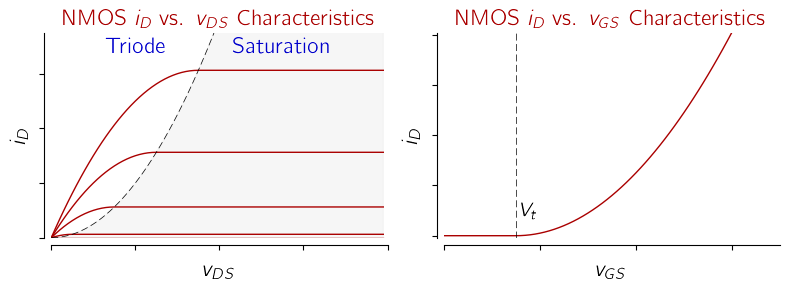

In [119]:
v_gs = np.arange(0.5, 5, 1.0)
v_tn = 1.0
v_ds = np.arange(0, 8, 0.1)

# Plot the i_D versus v_DS for different v_GS values.
fig = plt.figure(figsize=(8, 3.0))
ax = fig.add_subplot(121)
for vgs_val in v_gs:
    i_d = [nmos_id(vgs_val, v_ds_val, v_tn) for v_ds_val in v_ds]
    ax.plot(v_ds, i_d, lw=1, color="#aa0000")
# Triode and Saturation regions
vds_bndry = np.arange(v_tn, 9, 0.1)
id_sat = [nmos_id(vgs_val, vgs_val - v_tn, v_tn) for vgs_val in vds_bndry]
ax.plot(vds_bndry - v_tn, id_sat, lw=0.5, color="#000", dashes=[10, 5])
ax.fill_between(vds_bndry - v_tn, 0, id_sat, color="#eee", alpha=0.5)
ax.set_xlabel('$v_{DS}$')
ax.set_ylabel('$i_D$')
ax.set_title('NMOS $i_{D}$ vs. $v_{DS}$ Characteristics', color="#aa0000")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_position(('outward', 5))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(0, 8)
ax.set_ylim(0, 7.5)
# Add text for the different regions
ax.text(2.0, 6.75, 'Triode', fontsize=16, color='#0000cc', ha='center')
ax.text(5.5, 6.75, 'Saturation', fontsize=16, color='#0000cc', ha='center')

# i_D versus v_GS for different v_DS values.
ax = fig.add_subplot(122)
v_ds = 10
v_tn = 1.5
v_gs = np.arange(0, 7, 0.1)
i_d = [nmos_id(v_gs_val, v_ds, v_tn) for v_gs_val in v_gs]
ax.plot(v_gs, i_d, lw=1, color="#aa0000")
ax.axvline(v_tn, lw=0.5, color="#000", dashes=[10, 5])
ax.text(v_tn + 0.1, 1.0, '$V_{t}$', fontsize=14, color='#000', ha='left')
ax.set_xlabel('$v_{GS}$')
ax.set_ylabel('$i_D$')
ax.set_title('NMOS $i_{D}$ vs. $v_{GS}$ Characteristics', color="#aa0000")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position(('outward', 5))
ax.spines['left'].set_position(('outward', 5))
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xlim(0, 7)
ax.set_ylim(-0.1, 10.1)

plt.tight_layout()

plt.savefig('../lecture_notes/figure/ch03/fig03-mosfet-iv-curves.svg',
            format="svg", bbox_inches='tight')
plt.savefig('../lecture_notes/figure/ch03/fig03-mosfet-iv-curves.pdf',
            format="pdf", bbox_inches='tight')

170